In [1]:
import datetime
import os
from datetime import date
import dateutil.relativedelta

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

In [2]:
A=pd.read_csv("issues.csv")


In [3]:
#Q1 : Are there any useful patterns of outliers in the dataset?

df = A[['created_at','issue_number']]
df['created_at'] = pd.to_datetime(df['created_at'])
df.index = df['created_at']

C:\Users\mukti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
B = df.resample('W').count()


In [5]:
issueclosed = B['issue_number'].sum()
issueclosed

2000

In [6]:
avgissueclosed = issueclosed/47
avgissueclosed

42.5531914893617

In [7]:
stddevclosed = B['issue_number'].std()
stddevclosed

55.625646504284404

In [8]:
Rbar=B["issue_number"].sum()/39  ## mean value of range of each lot 
UCL_R= 2.114*Rbar                   ## upper control limit of range
LCL_R= 0*Rbar           

In [9]:
B.insert(2,'Rbar',Rbar)
B.insert(3,'UCL_R',UCL_R)
B.insert(4,'LCL_R',LCL_R)

<AxesSubplot:xlabel='created_at'>

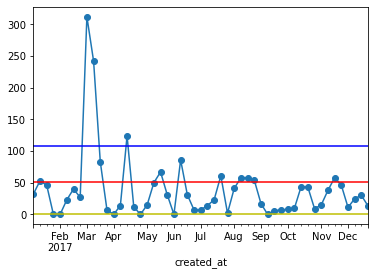

In [10]:
B["issue_number"].plot(marker="o")
B["UCL_R"].plot(color='b')
B["LCL_R"].plot(color='y')
B["Rbar"].plot(color='r')

# Ans 1 part 1

In [11]:
A=pd.read_csv("issues.csv")

In [12]:
df = A[['closed_at','issue_number']]
df['closed_at'] = pd.to_datetime(df['closed_at'])
df.index = df['closed_at']


C:\Users\mukti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
B = df.resample('W').count()


In [14]:
Rbar1=B["issue_number"].sum()/47  ## mean value of range of each lot 
UCL_R= 2.114*Rbar                   ## upper control limit of range
LCL_R= 0*Rbar     

In [15]:
B.insert(2,'Rbar1',Rbar1)
B.insert(3,'UCL_R1',UCL_R)
B.insert(4,'LCL_R1',LCL_R)

<AxesSubplot:xlabel='closed_at'>

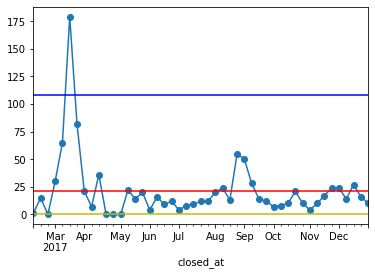

In [16]:
B["issue_number"].plot(marker="o")
B["UCL_R1"].plot(color='b')
B["LCL_R1"].plot(color='y')
B["Rbar1"].plot(color='r')

# ans 1 part 2

In [17]:
# Q2 : What are the UCL (Upper Control Limit) and LCL (Lower Control Limit) for certain issue metrics?
issueclosed = B['issue_number'].sum()
issueclosed

996

In [18]:
avgissueclosed = issueclosed/47
avgissueclosed

21.19148936170213

In [19]:
stddevclosed = B['issue_number'].std()
stddevclosed

28.82000987981632

In [20]:
# Q3 : 3. Can the outliers detect hidden problems in the given dataset?

df=pd.read_csv("issues.csv")


In [21]:
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [22]:

df['days'] = df['closed_at'] - df['created_at']

df1 = df.dropna()


In [23]:
dfq3 = df1[['issue_number','days']]
dfq3['days'].dt.days

2        9
3        9
6        9
7        9
10      19
        ..
1989    17
1990    17
1993    13
1994    13
1995    59
Name: days, Length: 996, dtype: int64

In [24]:
dfq3.dtypes


issue_number              int64
days            timedelta64[ns]
dtype: object

In [25]:
avgof = dfq3['days'].sum()
avgofdays = avgof/996
avgofdays

Timedelta('19 days 19:41:12.289156626')

<BarContainer object of 996 artists>

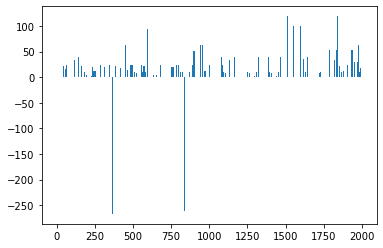

In [26]:
x = dfq3['issue_number']
y = dfq3['days'].dt.days
plt.bar(x,y)

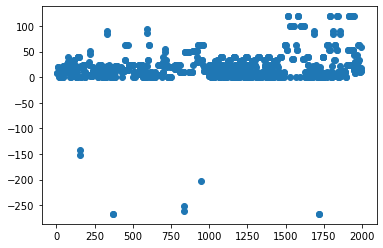

In [27]:
plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)

In [28]:
dfq4t = df[['Author','days','issue_number','created_at']]
dfq4 = dfq4t


<BarContainer object of 2000 artists>

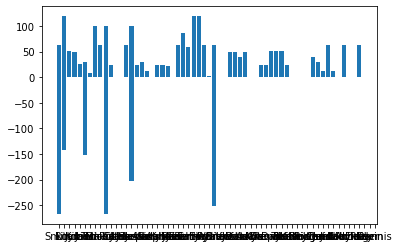

In [29]:
xq4 = dfq4['Author']
yq4 = dfq4['days'].dt.days

plt.bar(xq4,yq4)

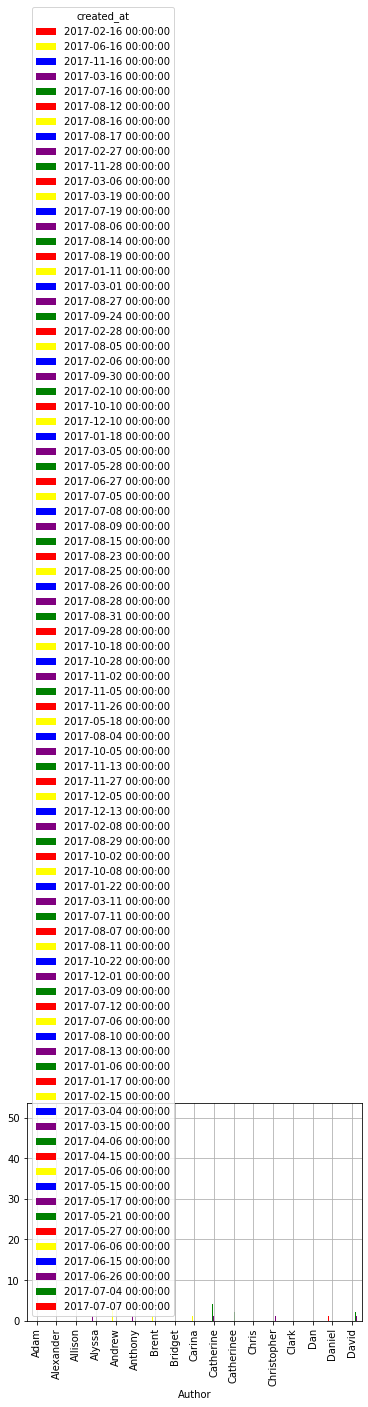

In [30]:
#Q4 . What is the correlation between outliers and hidden problems in the given dataset?

issuesbyday = dfq4.groupby(['Author','created_at']).issue_number.count().head(100)

dateLabelsFig = issuesbyday.unstack().plot(kind='bar',stacked=False,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=True)

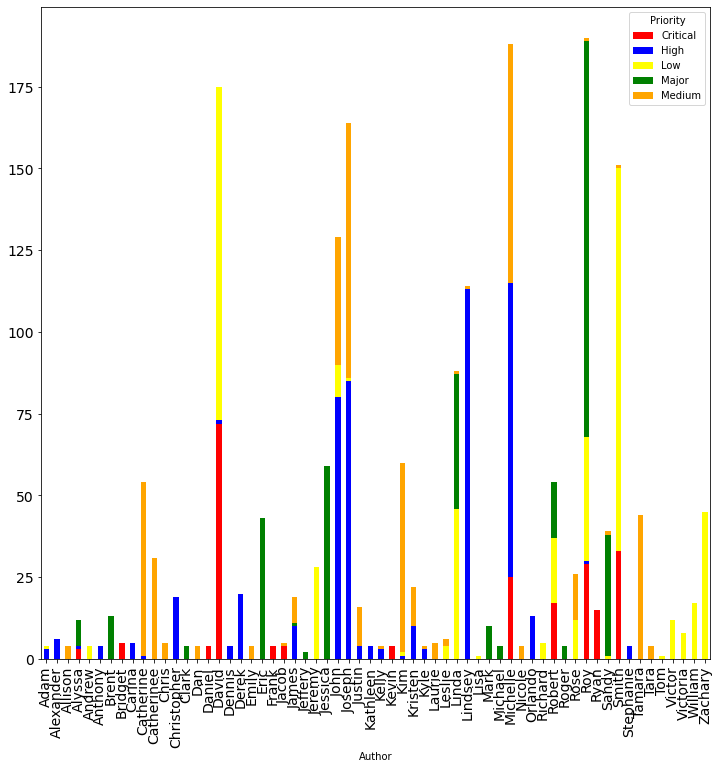

In [31]:
# Q5 How to detect if there is problem hidden in the given dataset? - explained in pdf file

#Q6 How to detect if certain engineer deliberately creates issues with Priority Critical?


q5df = df[df.Priority.eq('Critical')]

LabelsReviewedByDate = df.groupby(['Author','Priority']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','green','orange'], fontsize=14, figsize=(12,12),grid=False)

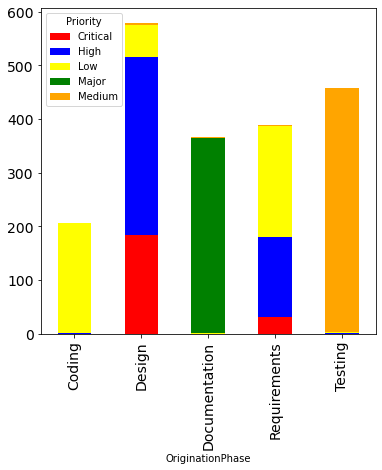

In [32]:
# Q7. How to detect if certain origination phase causes majority of the in progress Critical-Bug issues?

q6df = df[df.Priority.eq('Critical')]

LabelsReviewedByDate = df.groupby(['OriginationPhase','Priority']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','green','orange'], fontsize=14, figsize=(6,6),grid=False)

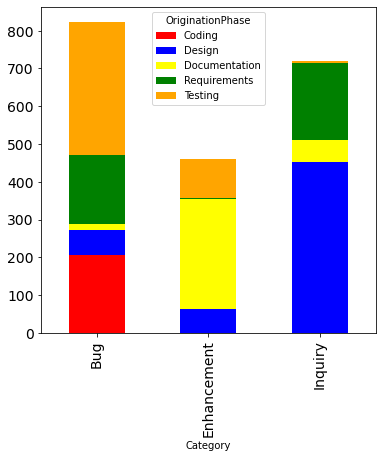

In [33]:
# Q8. Can you chart the patterns of outliers in the dataset? - answered in the pdf file

# Q9 Can you create the right pivot stacked bar chart? - answered in the pdf file

# Q10  How to group multi-levels? Group by Origination phase or Category for example

LabelsReviewedByDate = df.groupby(['Category','OriginationPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','green','orange'], fontsize=14, figsize=(6,6),grid=False)

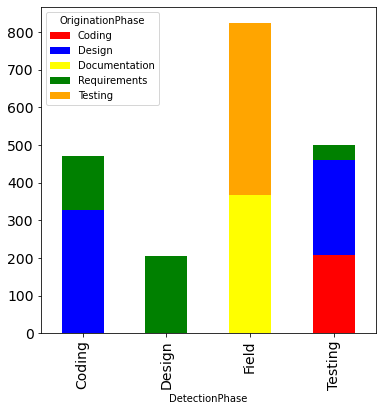

In [34]:
# Q11. How many Levels of indexing? Should the Priority be displayed in a pivotchart of DetectionPhase for example - answered in pdf file

# Q12 What is the avg number of issues opened per DetectionPhase?

LabelsReviewedByDate = df.groupby(['DetectionPhase','OriginationPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','green','orange'], fontsize=14, figsize=(6,6),grid=False)

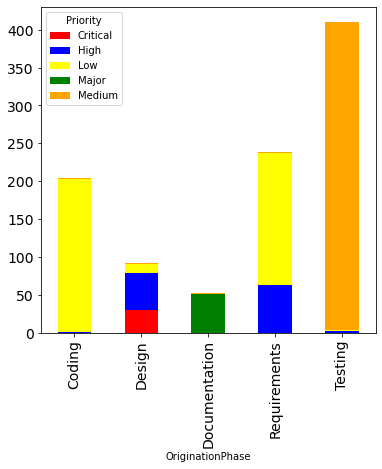

In [35]:
# Q13. What is the avg turn around time per issue (time from the day the issue created till it got closed)? 

noissuetesting = df[df.OriginationPhase.eq('Testing')]
noissuetesting

LabelsReviewedByDate = df.groupby(['OriginationPhase','Priority']).days.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True, figsize=(6,6) ,color=['red','blue','yellow','green','orange'], fontsize=14,grid=False)

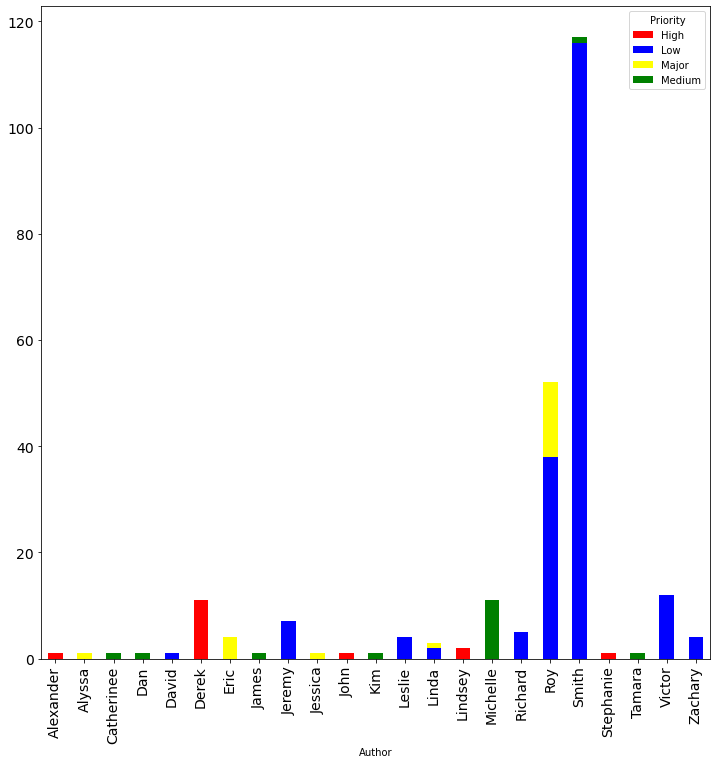

In [36]:
# Q14. What is the avg number of rejected issues opened per engineer?

noissuetesting = df[df.Status.eq('Rejected')]

LabelsReviewedByDate = noissuetesting.groupby(['Author','Priority']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True, figsize=(12,12) ,color=['red','blue','yellow','green','orange'], fontsize=14,grid=False)

In [37]:
forcoding = df[df.OriginationPhase.eq('Coding')].count()
nodayscoding = forcoding['days']
noissuecoding = forcoding['issue_number']
avgdayscoding = noissuecoding/ nodayscoding
avgdayscoding

1.0147058823529411

In [38]:
fordesign = df[df.OriginationPhase.eq('Design')].count()
nodaysdesign = fordesign['days']
noissuedesign = fordesign['issue_number']
avgdaysdesign = noissuedesign / nodaysdesign
avgdaysdesign

6.293478260869565

In [39]:
fordoc = df[df.OriginationPhase.eq('Documentation')].count()
nodaysdoc = fordoc['days']
noissuedoc = fordoc['issue_number']
avgdaysdoc = noissuedoc / nodaysdoc
avgdaysdoc

7.0576923076923075

In [40]:
forreq = df[df.OriginationPhase.eq('Requirements')].count()
nodaysreq = forreq['days']
noissuereq = forreq['issue_number']
avgdaysreq = noissuereq / nodaysreq
avgdaysreq

1.634453781512605

In [41]:
fortesting = df[df.OriginationPhase.eq('Testing')].count()
nodaystesting = fortesting['days']
noissuetesting = fortesting['issue_number']
avgdaystesting = noissuetesting / nodaystesting
avgdaystesting

1.1170731707317074

In [42]:
dfra = df[df.Status.eq('Rejected')]


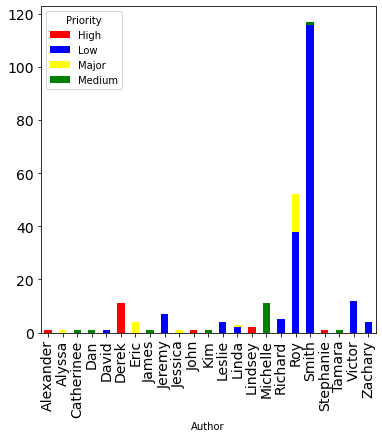

In [43]:
# 14. What is the avg number of rejected issues opened per engineer?

LabelsReviewedByDate = dfra.groupby(['Author','Priority']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red','blue','yellow','green','orange'], fontsize=14, figsize=(6,6),grid=False)

In [44]:
dfra = df[df.Status.eq('Rejected')].count()
dfa = df.Author.value_counts()
authordfa = len(dfa)
rejectedissue = dfra['issue_number']
avgrejissueperauthor = rejectedissue / authordfa
avgrejissueperauthor


3.9193548387096775

In [45]:
# Q15 What is the avg number of critical issues opened per engineer?

dfra = df[df.Priority.eq('Critical')].count()
dfa = df.Author.value_counts()
authordfa = len(dfa)
rejectedissue = dfra['issue_number']
avgrejissueperauthor = rejectedissue / authordfa
avgrejissueperauthor

3.467741935483871

In [46]:
#Q16 What is the avg number of rejected issues per Origination Phase?

fortesting = df[df.OriginationPhase.eq('Testing')].count()
nodaystesting = fortesting['days']
noissuetesting = fortesting['issue_number']
avgdaystesting = noissuetesting / nodaystesting
avgdaystesting

1.1170731707317074

In [47]:
dfra1 = df[df.Status.eq('Rejected')]
dfra = df[df.Status.eq('Rejected')].count()
rejectedissue = dfra['issue_number']
rejectedissue


243

In [48]:
# Q17 What is the avg number of critical issues per Origination Phase?

fortesting = dfra1[dfra1.OriginationPhase.eq('Documentation')].count()
fortesting

issue_number        21
OriginationPhase    21
DetectionPhase      21
Category            21
Priority            21
Status              21
created_at          21
closed_at           14
Author              21
days                14
dtype: int64

In [49]:
dfra2 = df[df.Priority.eq('Critical')]
dfra = df[df.Priority.eq('Critical')].count()
rejectedissue = dfra['issue_number']
rejectedissue


215

In [50]:
#Q18 What is the avg number of created issues per Origination Phase? - answered in pdf

#Q19 What is the avg number of rejected critical issues per Origination Phase?

fortesting = dfra2[dfra2.OriginationPhase.eq('Testing')].count()
fortesting

issue_number        0
OriginationPhase    0
DetectionPhase      0
Category            0
Priority            0
Status              0
created_at          0
closed_at           0
Author              0
days                0
dtype: int64

In [51]:
# Q20. What is the ratio of total number of critical to medium issues per Origination Phase?

dfra3 = df[df.Priority.eq('Critical')]
dfra3


,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author,days
0,1,Requirements,Coding,Bug,Critical,Approved,2017-02-24,NaT,Smith,NaT
8,9,Design,Testing,Inquiry,Critical,Approved,2017-03-04,NaT,David,NaT
18,19,Design,Testing,Inquiry,Critical,Approved,2017-03-06,NaT,Smith,NaT
27,28,Design,Testing,Inquiry,Critical,Approved,2017-08-15,NaT,David,NaT
38,39,Design,Testing,Inquiry,Critical,Approved,2017-03-06,NaT,Roy,NaT
...,...,...,...,...,...,...,...,...,...,...
1918,1919,Design,Testing,Bug,Critical,Approved,2017-11-15,NaT,David,NaT
1954,1955,Design,Testing,Inquiry,Critical,Approved,2017-12-15,NaT,David,NaT
1973,1974,Design,Testing,Inquiry,Critical,Approved,2017-12-15,NaT,David,NaT
1975,1976,Design,Testing,Inquiry,Critical,Approved,2017-10-19,NaT,Ryan,NaT


In [52]:
dfra4 = dfra3[dfra3.Status.eq('Rejected')]
dfra4

,issue_number,OriginationPhase,DetectionPhase,Category,Priority,Status,created_at,closed_at,Author,days


In [53]:
df5 = df[df.Priority.eq('Critical')]
df6 = df[df.Priority.eq('Medium')]
dfopc = df5[df5.OriginationPhase.eq('Testing')].count()
dfopm = df6[df6.OriginationPhase.eq('Testing')].count()
dfopc

issue_number        0
OriginationPhase    0
DetectionPhase      0
Category            0
Priority            0
Status              0
created_at          0
closed_at           0
Author              0
days                0
dtype: int64

In [54]:
dfopm

issue_number        454
OriginationPhase    454
DetectionPhase      454
Category            454
Priority            454
Status              454
created_at          454
closed_at           406
Author              454
days                406
dtype: int64

In [55]:
df = pd.read_csv("issues.csv")


In [56]:
# Q21. Which month got the maximum number of Critical issues created?

A = df[df.Priority.eq('Critical')]


In [57]:
A = df[df.Priority.eq('Critical')]
dfmax = A[['created_at','issue_number']]

dfmax['created_at'] = pd.to_datetime(dfmax['created_at'])
dfmax
# df.index = df['created_at']

C:\Users\mukti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,created_at,issue_number
0,2017-02-24,1
8,2017-03-04,9
18,2017-03-06,19
27,2017-08-15,28
38,2017-03-06,39
...,...,...
1918,2017-11-15,1919
1954,2017-12-15,1955
1973,2017-12-15,1974
1975,2017-10-19,1976


In [58]:
dfmax.groupby(dfmax['created_at'].dt.strftime('%B'))['issue_number'].count().sort_values()



created_at
September     3
April         4
July          5
December      7
February      8
October      10
June         12
January      13
May          17
November     18
August       30
March        88
Name: issue_number, dtype: int64

In [59]:
#df['created_at'] = pd.to_datetime(df['created_at']) - pd.to_timedelta(7, unit='d')
#df.groupby([pd.Grouper(key='created_at', freq='W-MON')])['issue_number'].count().reset_index().sort_values('issue_number')

In [60]:
# Q22. Which week got the minimum number of issues created?

df = df[['created_at','issue_number']]
df['created_at'] = pd.to_datetime(df['created_at'])
df.index = df['created_at']

In [61]:
B = df.resample('W').count()

B.sort_values(by=['issue_number'])



,created_at,issue_number
created_at,,
2017-04-30,0,0
2017-06-04,0,0
2017-04-02,0,0
2017-01-29,0,0
2017-02-05,0,0
2017-09-10,0,0
2017-07-30,2,2
2017-09-17,6,6
2017-03-26,7,7
